In [3]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [4]:
# Read the Iris data and check its contents
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# Get the features names of the data set
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# What the target variable classes
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Creating a data frame from the data sub variable of iris data
df = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Check different entries of the target sub variable
iris_data['target']

# 0 is Setosa, 1 is Versicolor and 2 is Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Adding a new column called target that will act as input variable
df['target'] = iris_data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Divide the sample in input(X) and output(y) variable
X = df.drop(['target'], axis = 1)
y = df['target']

In [34]:
# Train test split the input and output variable with test size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# Define the KNN object as model
model = KNeighborsClassifier(n_neighbors = 3)

In [36]:
# Fit X_train and y_train as training data
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Predicting the model outcome as y_pred
y_pred = model.predict(X_test)

In [38]:
# Check the perfomance of the model
print('Accuracy of the model is:', accuracy_score(y_test, y_pred))

Accuracy of the model is: 0.9666666666666667


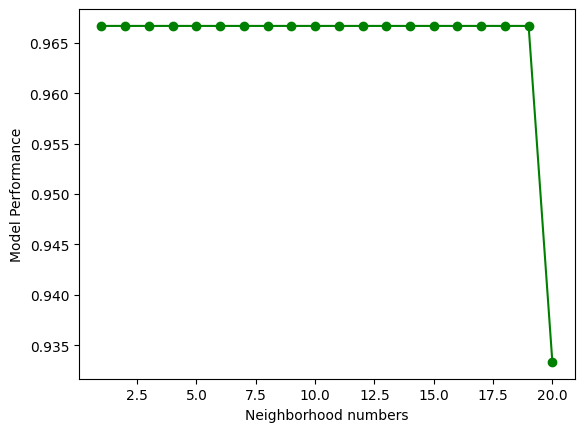

In [43]:
# Plot the accuracy score of the model for diferent k values
accuracy = []
for k in range(1,21):
  model_k = KNeighborsClassifier(n_neighbors = k)
  model_k.fit(X_train, y_train)
  y_pred_k = model_k.predict(X_test)
  performance = accuracy_score(y_test, y_pred_k)
  accuracy.append(performance)

# Get the line plot
plt.plot(range(1,21), accuracy, color = 'green', linestyle = '-', marker = 'o')
plt.xlabel('Neighborhood numbers')
plt.ylabel('Model Performance')
plt.show()